In [1]:
# import Libraries
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
train = pd.read_csv('SalaryData_Train.csv')

In [3]:
test = pd.read_csv('SalaryData_Test.csv')

In [5]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,24,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15072,34,Private,Some-college,10,Divorced,Prof-specialty,Not-in-family,Black,Male,0.0,0.0,40.0,Germany,>50K
15073,27,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
15074,26,Private,Assoc-voc,11,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,48.0,United-States,<=50K


In [6]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15076 entries, 0 to 15075
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15076 non-null  int64  
 1   workclass      15076 non-null  object 
 2   education      15076 non-null  object 
 3   educationno    15076 non-null  int64  
 4   maritalstatus  15076 non-null  object 
 5   occupation     15076 non-null  object 
 6   relationship   15076 non-null  object 
 7   race           15076 non-null  object 
 8   sex            15075 non-null  object 
 9   capitalgain    15075 non-null  float64
 10  capitalloss    15075 non-null  float64
 11  hoursperweek   15075 non-null  float64
 12  native         15075 non-null  object 
 13  Salary         15075 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.6+ MB


In [8]:
train.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15076.000000,15076.000000,15075.000000,15075.000000,15075.000000
mean,38.429690,10.130937,1075.771808,88.819502,40.956086
std,13.140361,2.531127,7352.766384,403.482923,11.897106
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
test['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [12]:
train[train.duplicated()].shape

(1005, 14)

In [13]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,18,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
15041,29,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
15069,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15071,24,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [14]:
Train =train.drop_duplicates()

In [15]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15068,41,Private,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15070,45,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,35.0,United-States,<=50K
15072,34,Private,Some-college,10,Divorced,Prof-specialty,Not-in-family,Black,Male,0.0,0.0,40.0,Germany,>50K
15074,26,Private,Assoc-voc,11,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,48.0,United-States,<=50K


In [18]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [23]:
Train =train.drop(15075,axis=0)

In [24]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15070,45,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,35.0,United-States,<=50K
15071,24,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15072,34,Private,Some-college,10,Divorced,Prof-specialty,Not-in-family,Black,Male,0.0,0.0,40.0,Germany,>50K
15073,27,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K


In [25]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [26]:
test[test.duplicated()].shape

(930, 14)

In [27]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [28]:
Test=test.drop_duplicates()

In [29]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [30]:
Test.isnull().sum().sum()

0

In [31]:
Train['Salary'].value_counts()

 <=50K    11351
 >50K      3724
Name: Salary, dtype: int64

In [32]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [33]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1699,248
Armed-Forces,4,0
Craft-repair,1535,446
Exec-managerial,999,955
Farming-fishing,421,49
Handlers-cleaners,586,42
Machine-op-inspct,871,131
Other-service,1554,67
Priv-house-serv,75,0


In [34]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,305,176
Local-gov,707,297
Private,8713,2418
Self-emp-inc,245,295
Self-emp-not-inc,907,354
State-gov,470,184
Without-pay,4,0


In [35]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,164,4,37,78,2,11,7,23,0,81,19,8,34,13
Local-gov,149,0,70,96,15,16,4,91,0,347,142,5,15,54
Private,1454,0,1523,1305,215,590,952,1343,75,1102,96,1493,337,646
Self-emp-inc,17,0,45,203,20,1,8,13,0,74,2,140,2,15
Self-emp-not-inc,31,0,276,185,210,6,23,87,0,190,3,187,14,49
State-gov,132,0,29,87,6,3,8,64,0,215,59,3,32,16
Without-pay,0,0,1,0,2,1,0,0,0,0,0,0,0,0


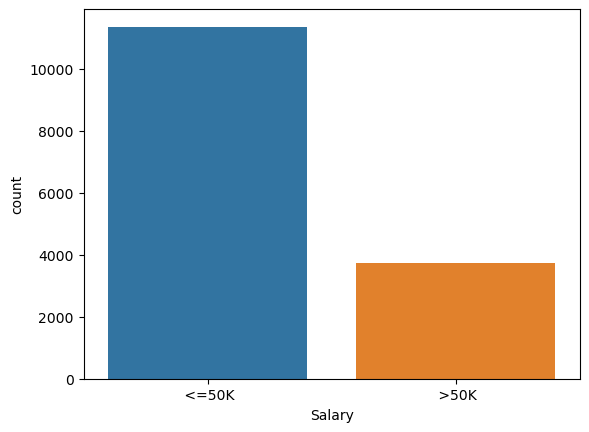

 <=50K    11351
 >50K      3724
Name: Salary, dtype: int64

In [36]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

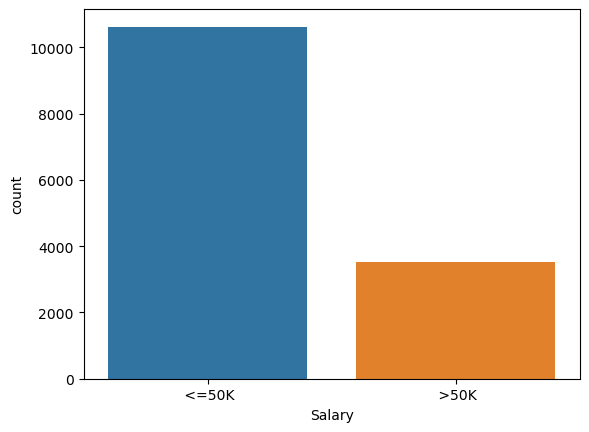

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [37]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

C:\Users\PC-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


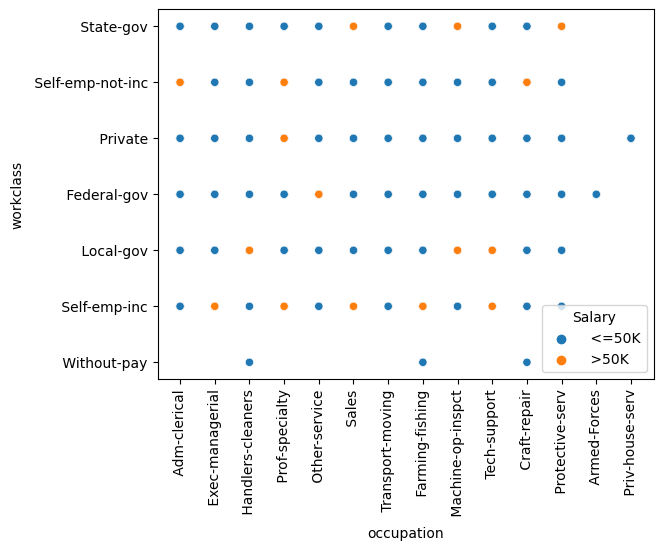

In [42]:
sns.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='education'>

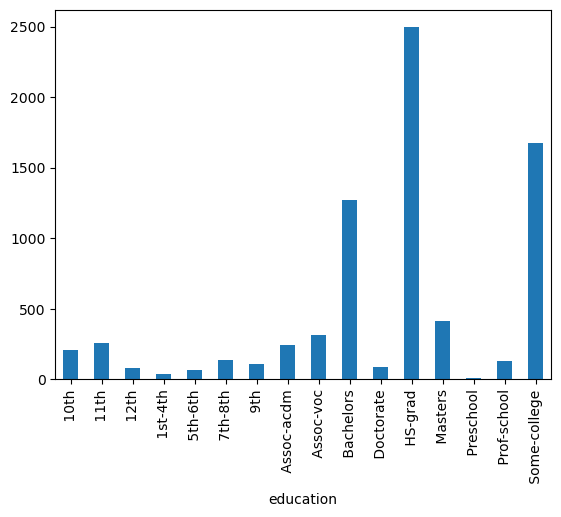

In [43]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

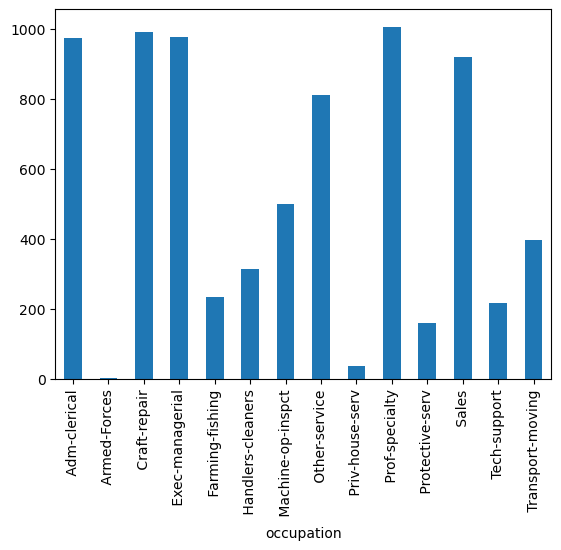

In [44]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

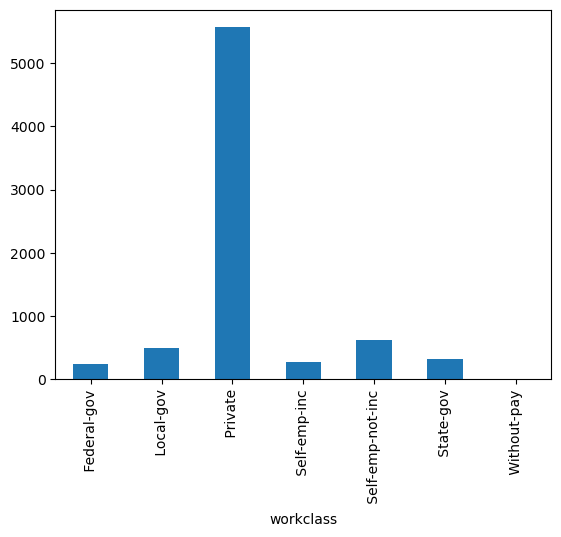

In [45]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

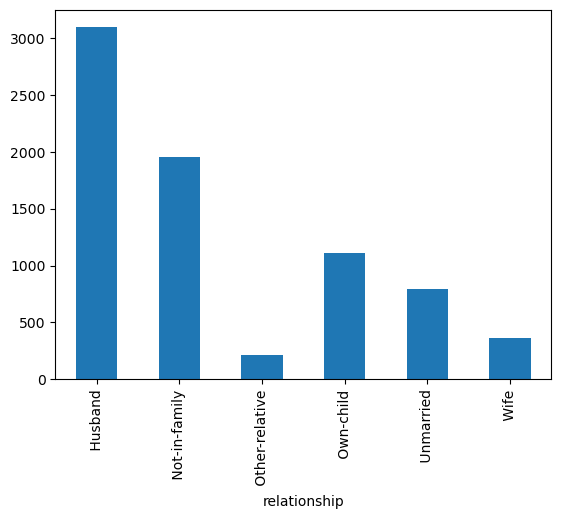

In [46]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

In [47]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [48]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

C:\Users\PC-1\AppData\Local\Temp\ipykernel_6880\1645268687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])


In [49]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15070,45,2,11,9,0,11,1,4,0,0.0,0.0,35.0,37,<=50K
15071,24,2,11,9,2,6,0,4,1,0.0,0.0,40.0,37,<=50K
15072,34,2,15,10,0,9,1,2,1,0.0,0.0,40.0,10,>50K
15073,27,2,9,13,4,11,1,4,0,0.0,0.0,40.0,37,<=50K


In [50]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [51]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [52]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15070,45,2,11,9,0,11,1,4,0,0.0,0.0,35.0,37,<=50K
15071,24,2,11,9,2,6,0,4,1,0.0,0.0,40.0,37,<=50K
15072,34,2,15,10,0,9,1,2,1,0.0,0.0,40.0,10,>50K
15073,27,2,9,13,4,11,1,4,0,0.0,0.0,40.0,37,<=50K


In [53]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [54]:
Test['maritalstatus'].value_counts()


2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [55]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [56]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [57]:
x_train

array([[39.,  5.,  9., ...,  0., 40., 37.],
       [50.,  4.,  9., ...,  0., 13., 37.],
       [38.,  2., 11., ...,  0., 40., 37.],
       ...,
       [34.,  2., 15., ...,  0., 40., 10.],
       [27.,  2.,  9., ...,  0., 40., 37.],
       [26.,  2.,  8., ...,  0., 48., 37.]])

In [58]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [59]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# naive bayes

## MultinomialNB

In [60]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [61]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.7529684908789387

In [63]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi 

0.7515923566878981

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [65]:
confusion_matrix

array([[10620,     0],
       [ 3510,     0]], dtype=int64)

In [66]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.7515923566878981


## GaussianNB

In [67]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [68]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau

0.79787728026534

In [69]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau

0.7978768577494693

In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [71]:
confusion_matrix

array([[10047,   573],
       [ 2283,  1227]], dtype=int64)

In [72]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7978768577494693
